In [59]:
#Bitte ausführen, damit alles Notwendige importiert wird
#Note: Bei Änderungen der zugrundeliegenden Python-Files muss Jupyter neugestartet werden
import scipro

In [60]:
%%html
<!--Bitte diese Cell mit Run ausführen, damit die Styles geladen werden-->
<!--Bei Änderungen des CSS muss das Notebook im Browser neu geladen werden-->
<link rel="stylesheet" href="./styles/sciprolab.css">

# SPL-Programmentwurf

## Gruppe


Namen der Gruppenmitglieder

## Teil 1: Riemann Integrale mit Ober- und Untersummen, Trapezregel
<img src="images/riemann.png" width="400" style="background-color:white; padding:10px;">

Das Riemannsche Integral ist eine Methode, um die Fläche unter einer Kurve mathematisch zu bestimmen. Der Name kommt von dem deutschen Mathematiker Bernhard Riemann, der das Konzept im 19. Jahrhundert formalisiert hat. Troz seiner Grenzen ist das Riemann-Integral für viele Anwendungen ausreichend. Allerdings gibt es auch Funktionen die man mit dem Riemann-Integral nicht integrieren kann, sie aber gerne integrienen würde. So wurden nach und nach weitere Integraldefinitionen eingeführt, mit denen mehr Funktionen integrierbar sind. 

### Grundidee
<img src="images/riemann_integral.png" width="600" style="background-color:white; padding:10px;">

Die Grundidee ist, dass ein Intervall [a,b], über das integriert werden soll, in viele kleine Teilintervalle zu zerlegen. Über jedem dieser Teilintervalle wird ein Rechteck errichtet, dessen Breite die Intervalllänge ist und dessen Höhe durch den Funktionswert an einer bestimmten Stelle im Teilintervall bestimmt wird. Die Summe dieser Rechteckflächen nähert sich an die Fläche unter der Kurve an.  
Dementsprechend folgt aus einer feineren Zerlegung des Intervals eine genauere Approximation. 
Im Grenzfall, also wenn die Breite der Teilintervalle gegen Null geht, konvergiert diese Summe gegen das Riemann-Integral. Das Riemann-Integrall bezeichnet dabei den Grenzwert der unendlichen Summe.

Das $\int$ Zeichen wurde von Leibniz eingeführt und ist die kursive Variante des "langen s", welches heute nicht mehr gebräuchlicht ist und als Abkürzung für das lateinische Wort summa stand. 

#### Ober- und Untersummen  
Mittels der Ober- und der Untersumme bekommt man eine obere und untere Abschätzung für die wahre Fläche.

Bei der Obersumme nutzt man die größte Höhe der Funktion im Teilintervall → die Rechtecke überdecken die Kurve teilweise.

<img src="images/obersumme.png" width="400" style="background-color:white; padding:10px;">

Bei der Untersumme nutzt man jeweils die kleinste Höhe der Funktion im Teilintervall → die Rechtecke liegen komplett unter der Kurve.

<img src="images/untersumme.png" width="400" style="background-color:white; padding:10px;">

Je kleiner die Teilintervalle werden, desto kleiner ist die Differenz zwischen Ober- und Untersumme.

#### Trapezregel  
Hier nehmen wir statt Rechtecken Trapeze, die den Kurvenverlauf besser nachbilden. So ist die Näherung oft genauer als bei Rechtecken.  
Zwischen jedem benachbarten Punkt auf der Kurve ziehen wir eine Gerade und berechnen die Fläche des entstehenden Trapezes. Nachdem wir das für jedes Intervall gemacht haben zählen wir die Flächen aller Trapeze zusammen.

<img src="images/trapezregel.png" width="400" style="background-color:white; padding:10px;">


### Mathematische Definition

Sei  $
f : [a,b] \to \mathbb{R}
$  eine beschränkte Funktion und [a,b] ein abgeschlossenes Intervall.

1. Zerlege das Intervall in  n  Teilintervalle:

$$
a = x_0 < x_1 < x_2 < \dots < x_n = b
$$

2. Wähle für jedes Teilintervall [x<sub>i-1</sub>, x<sub>i</sub>] einen beliebigen Punkt c<sub>i</sub> aus dem Intervall.

3. Die Riemann-Summe lautet:

$$
S_n = \sum_{i=1}^{n} f(c_i) \cdot (x_i - x_{i-1})
$$

4. Das Riemann-Integral von f über [a,b] ist definiert als Grenzwert dieser Summe, wenn die maximale Länge der Teilintervalle ||P|| gegen Null geht:

$$
\int_a^b f(x) \, dx = \lim_{||P|| \to 0} \sum_{i=1}^{n} f(c_i) \cdot (x_i - x_{i-1})
$$

---

#### Ober- und Untersumme

c<sub>i</sub> ist bei der **Obersumme** der x-Wert an der Stelle, wo die Funktion im Teilintervall am höchsten ist. 
$$
O(f, P) = \sum_{i=1}^{n} M_i \cdot (x_i - x_{i-1})
$$
mit
$$
M_i = \max \{ f(x) \mid x \in [x_{i-1}, x_i] \}
$$
Bei der **Untersumme** ist c<sub>i</sub>  der x-Wert an der Stelle, wo die Funktion im Teilintervall am kleinsten ist.
$$
U(f, P) = \sum_{i=1}^{n} m_i \cdot (x_i - x_{i-1})
$$
mit
$$
m_i = \min \{ f(x) \mid x \in [x_{i-1}, x_i] \}
$$

---

#### Trapezregel
$$
\int_a^b f(x) \, dx  \approx  {h} \left[ \frac{1}{2}f(x_0) + \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]
$$

Dabei ist:

- a und b die Grenzen des Integrals,
- n die Anzahl der Teilintervalle,
- $
x_i = a + i \cdot h \quad \text{mit} \quad h = \frac{b - a}{n}
$
 .


In [61]:
# Code für numerische Integration mittels Obersummen, Untersummen und der Trapezregel
import numpy as np

class NumerischesIntegral:
    def __init__(self, f, a, b, n):
        self.f_raw = f
        self.a = a
        self.b = b
        self.n = n
        self.h = (b - a) / n

        self.f = self._safe_f(f)
        self.x_values = np.linspace(a, b, n + 1)
        self.y_values = np.array([self.f(xi) for xi in self.x_values])

    def _is_defined(self, x):
        try:
            val = self.f_raw(x)
            return np.isfinite(val)
        except:
            return False

    def _safe_f(self, f):
        return lambda x: f(x) if self._is_defined(x) else np.nan

    def obersumme(self):
        summe = 0
        for i in range(self.n):
            xs = np.linspace(self.x_values[i], self.x_values[i+1], 100)
            ys = [self.f(x) for x in xs if np.isfinite(self.f(x))]
            if ys:
                summe += max(ys) * self.h
        return summe

    def untersumme(self):
        summe = 0
        for i in range(self.n):
            xs = np.linspace(self.x_values[i], self.x_values[i+1], 100)
            ys = [self.f(x) for x in xs if np.isfinite(self.f(x))]
            if ys:
                summe += min(ys) * self.h
        return summe

    def trapezregel(self):
        summe = 0
        for i in range(self.n):
            y1 = self.y_values[i]
            y2 = self.y_values[i + 1]
            if np.isnan(y1) or np.isnan(y2):
                continue
            summe += 0.5 * (y1 + y2) * self.h
        return summe

    def berechne(self, methode='trapez'):
        methode = methode.lower()
        if methode == 'trapez':
            return self.trapezregel()
        elif methode == 'obersumme':
            return self.obersumme()
        elif methode == 'untersumme':
            return self.untersumme()
        else:
            raise ValueError("Ungültige Methode: 'trapez', 'obersumme' oder 'untersumme' erwartet.")

    def werte_berechnen(self):
        """
        Gibt ein Dictionary {x: y} mit gültigen Funktionswerten zurück.
        Ungültige y-Werte (None, NaN, ±Inf) werden ignoriert.
        """
        werte_dict = {}
        for x in self.x_values:
            try:
                y = self.f(x)
                if y is None or not np.isfinite(y):
                    continue
                werte_dict[x] = y
            except Exception:
                continue
        return dict(sorted(werte_dict.items()))

## Teil 2: Integration mittels Monte-Carlo-Simulation

### Was ist die Monte-Carlo-Simulation?
#### Definition & Ursprung
Die Monte-Carlo-Simulation ist eine Art Rechenalgorithmus, der wiederholte Zufallsstichproben nutzt, um die Auftretenswahrscheinlichkeit einer Reihe von Ergebnissen zu schätzen. Der Name stammt von der Spielbank Monte Carlo, da das Verfahren mit Zufallswerten zusammenhängt - ähnlich wie beim Glücksspiel. Erfunden wurde die Monte-Carlo-Simulation von John von Neumann und Stanislaw Ulam während des zweiten Weltkriegs mit dem Ziel die Entscheidungsfindung unter unsicheren Bedingungen zu verbessern.

<div style="display: flex; flex-direction: row">
    <figure>
        <img src="images/john_von_neumann.png" style="background-color:white; padding:10px; height: 250px">
        <figcaption>John von Neumann</figcaption>
    </figure>
    <figure>
        <img src="images/stanislaw_ulam.png" style="background-color:white; padding:10px; height: 250px">
        <figcaption>Stanislaw Ulam</figcaption>
    </figure>
</div>

#### Anwendungsbeispiele
Die Monte-Carlo-Simulation wird in vielen Bereichen gebraucht. Man benutzt sie im Zusammenhang mit KI (künstlicher Intelligenz), Aktienkursen, Umsatzprognosen, Projektmanagement, Preisgestaltung usw..

#### Vorteile
Besonders geeignet ist die Monte-Carlo-Simulation bei komplexen, verrauchten oder stochastischen Systemen. Gegenüber anderen Vorhersagemodellen mit festen Eingaben bietet sie eine Reihe von Vorteilen. Zum Beispiel bietet sie die Möglichkeit Sensitivitätsanalysen durchzuführen, oder die Korrelation con Eingaben zu berechnen. Die Sensitivitätsanalyse ermöglicht es Entscheidungsträgern, die Auswirkungen einzelner Eingaben auf ein bestimmtes Ergebnis zu erkennen. Die Korrelation wiederum gibt ihnen die Möglichkeit, die Beziehungen zwischen beliebigen Eingabevariablen zu verstehen.

#### Funktionsweise
1. Modell möglicher Ereignisse erstellen
   - Man hat eine Situation mit gewissen Unsicherheiten (z.B. Wetter, Preise, Nachfrage). Man baut dann ein Modell, welches beschreibt, wie sich diese Unsicherheiten auf das Ergebnis auswirken
   - z.B. Man will berechnen wie viel Gewinn ein Unternehmen in einem Monat macht: Man weiß nicht genau wie viele Kunden kommen, und auch nicht wie hoch die Kosten pro Produkt sind. Also modelliert man das Ganze mit Wahrscheinlichkeiten.
2. Verwendung von Wahrscheinlichkeitsverteilungen
   - Man wählt eine Wahrscheinlichkeitsverteilung
   - z.B. "Die Nachfrage liegt wahrscheinlich zwischen 80 und 120 - am häufigsten aber bei 100." -> Das ist eine Normalverteilung (Glockenkurve) oder "Die Nachfrage ist gleich wahrscheinlich zwischen 80 und 120" -> Das ist eine Gleichverteilung.
   - Diese Verteilungen modellieren die Unsicherheit mathematisch
3. Viele Wiederholungen mit Zufallszahlen.
   Das ist der Kern der Simulation: Der Computer zieht zufällige Werte aus den Verteilungen und berechnet mit diesen das Ergebnis. Das macht er dann wieder und wieder (z.B. 10.000 Mal). Jedes Mal mit neuen Zufallszahlen aus denselben Verteilungen
4. Am Ende hat man eine große Menge an möglichen Ergebnissen und kann dann den Durchschnitt, die Verlustwahrscheinlichkeit und das Risiko (wie stark die Schwankung ist) berechnen

### Monte-Carlo-Integration
Die Monte-Carlo-Integration ist eine Methode, mit der man Integrale mithilfe von Zufallszahlen näherungsweise berechnet, statt sie wie bei klassischen Methoden (z.B. Trapezregel) mit festen Stützstellen auszurechnen.

#### Direkte Monte-Carlo-Integration
1. Zufällige x-Werte werden aus dem Intervall [a,b] genommen.
2. Für jeden Punkt x<sub>i</sub> wird f(x<sub>i</sub>) berechnet.
3. Der Mittelwert aller f(x<sub>i</sub>) wird gebildet.
4. Dann multipliziert man mit der Breite des Intervalls:

$$
\int_a^b f(x)\,dx \approx (b - a) \cdot \frac{1}{N} \sum_{i=1}^N f(x_i)
$$

(Vergleich zur normalen Integration: da werden feste Punkte anstatt zufallspunkten verwendet)

##### Nachteile
- Klassische numerische Verfahren sind viel genauer
- Monte Carlo braucht viel mehr Punkte, um ähnlich gute Ergebnisse zu liefern

##### Vorteile
- Monte-Carlo-Integration funktioniert auch bei hochdimensionalen Integralen, da versagen klassische Methoden
- Funktioniert auch, wenn man die Funktion nur stellenweise oder schwer berechnen kann

##### Genauigkeit
Bei klassischen Methoden weiß man genau, wie der Fehler abnimmt, bei Monte-Carlo nimmt die Streuung (Varianz) der Ergebnisse mit mehr Punkten ab. Der Erwartungswert des Ergebnisses ist korrekt, aber er "zittert" mehr. Dabei gilt bei Monte-Carlo:
$$
mehr Punkte == genauere Schätzung
$$

#### Hit-or-Miss-Methode
Die Hit-or-Miss-Methode ist eine andere Variante der Monte-Carlo-Integration.

1. Man denkt an das Integral als Fläche unter einer Kurve
2. Ein Rechteck wird gezeichnet, das die Fläche ganz enthält
3. Viele Zufällige Punkte werden im Rechteck erzeugt
4. Für jeden Punkt prüft man:
    Liegt er unter der Kurve? -> Treffer, sonst Fehlschlag
5. Der Anteil der Treffer ≈ Anteil der Fläche -> Fläche unter der Kurve:

$$
Integral ≈ Trefferquote \cdot Fläche des Rechtecks
$$

<img src="images/hit-or-miss-methode.png" width="400" style="background-color:white; padding:10px;">

Besonders ist hier, dass man nicht den Funktionswert berechenen muss, sondern nur entscheiden muss, ob ein Punkt "unter dem Graph" liegt. Das ist nützlich, wenn f(x) kompliziert ist oder man Wurzeln vermeiden will.

Beispiel:

$$
f(x) = \sqrt{1-x²}
$$

Statt die Wurzel zu berechnen prüft man einfach:
$$
x² + y² < 1 => \text{Punkt liegt unter der Kurve}
$$

In [62]:

from typing import Callable
import random
import numpy as np





class MonteCarloSimulation:
    
    
    def __init__(self):
        self.Untergrenze = None
        self.Obergrenze = None 
        self.Anzahl_Stichproben = None
    
    
    def Grenzsuche(self):
        Untergrenze = random.randint(-1000, 1000 - 1)
        Obergrenze = random.randint(-1000 + 1, 1000)
        while Obergrenze < Untergrenze:
            Obergrenze = random.randint(-1000, 1000)
        return Untergrenze, Obergrenze

    
    def Stichproben_Erstellen(self, Anzahl_Stichproben: int, Untergrenze: float, Obergrenze:float):
        Stichproben =[]
        for i in range(Anzahl_Stichproben):
            x = random.uniform(Untergrenze, Obergrenze)
            Stichproben.append(x)
        return Stichproben
    
    def Koordinaten_berechnen(self, funktion: Callable[[float], float]):
        self.Koordinaten_dict = {}
        for x in self.Stichproben:
            y = funktion(x)
            if y is None or not np.isfinite(y):
                continue 
            self.Koordinaten_dict[x] = y
        return dict(sorted(self.Koordinaten_dict.items()))
        
    
    def Monte_Carlo_Simulation(self, funktion: Callable[[float], float], Anzahl_Stichproben: int, Modus: str="m", User_Untergrenze: float = None, User_Obergrenze: float = None):
        if Modus == "m":
            self.Untergrenze = User_Untergrenze
            self.Obergrenze = User_Obergrenze
        elif Modus == "e":
            self.Untergrenze, self.Obergrenze = self.Grenzsuche()
        else:
            raise ValueError("Modus muss 'm' oder 'e' sein")
        if self.Obergrenze < self.Untergrenze:
            self.Obergrenze, self.Untergrenze = self.Untergrenze, self.Obergrenze
        self.Anzahl_Stichproben = Anzahl_Stichproben  
        Summe_f = 0.0
        self.Werte = 0
        self.Stichproben = self.Stichproben_Erstellen(Anzahl_Stichproben, self.Untergrenze, self.Obergrenze)
        for x in self.Stichproben:
            try:
                with np.errstate(divide='ignore', invalid='ignore', over='ignore'):
                    y = funktion(x)
            except Exception:
                continue
            if y is None or not np.isfinite(y):
                continue
            Summe_f += y
            self.Werte += 1
        if self.Werte == 0:
            print("Keine gültige Funktionswerte gefunden. Definitionsbereich oder Funktion ändern.")
            return
        self.Ergebnis = (self.Obergrenze - self.Untergrenze)/self.Anzahl_Stichproben * Summe_f
        return self.Ergebnis
    
    def __str__(self):
        if self.Ergebnis is None:
            return "Monte-Carlo konnte kein Ergebnis liefern."
        return f"Approximiertes Integral von f(x) im Intervall [{self.Untergrenze}, {self.Obergrenze}] ≈ {self.Ergebnis} mit {self.Werte} von {self.Anzahl_Stichproben} gültigen Stichproben"

## Teil 3: Darstellung der Integrationsmethoden

### Riemansche Integration Visualisiert

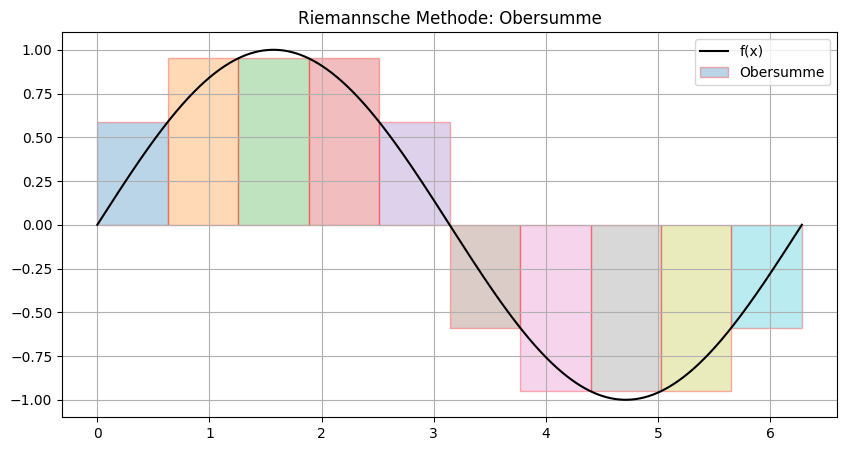

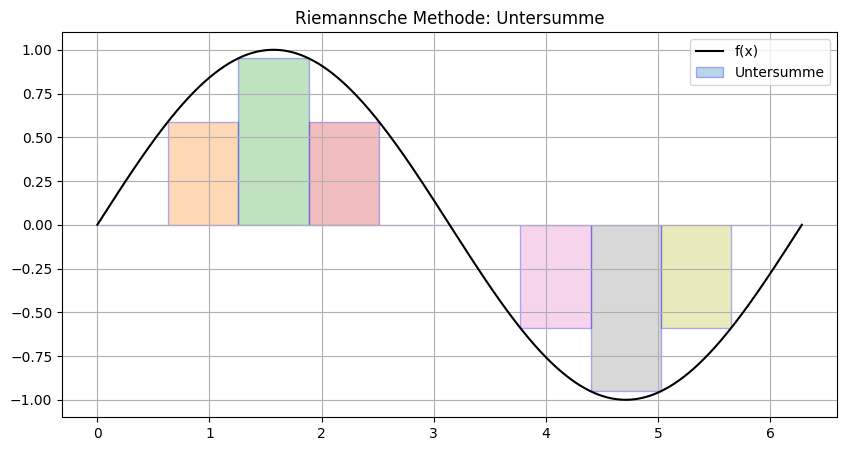

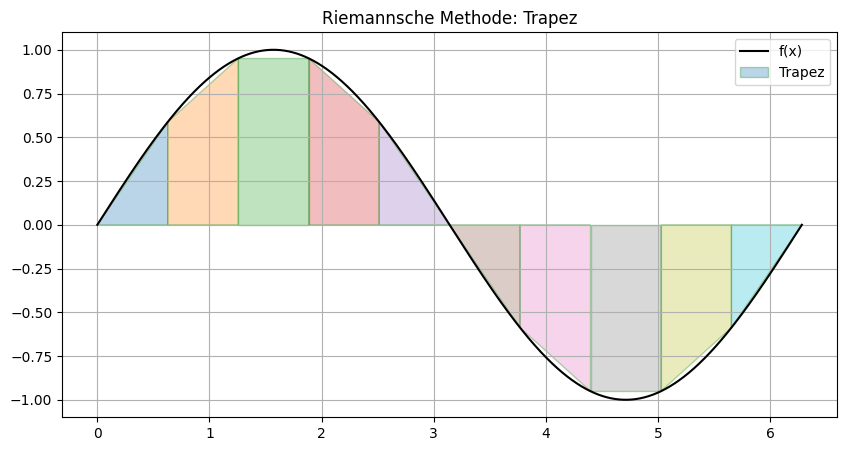

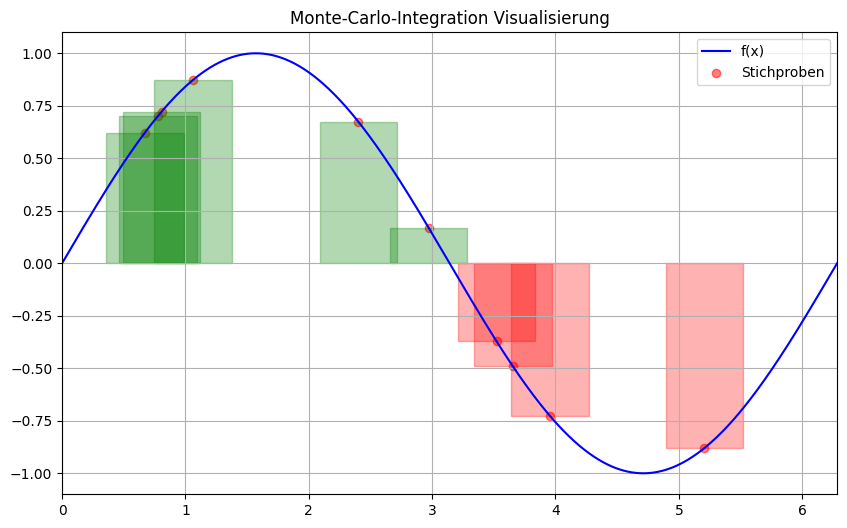

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

class IntegrationsVisualizer:
    def __init__(self, obj):
        self.obj = obj

    def visualize_riemann(self, methode='trapez'):
        if not hasattr(self.obj, 'x_values') or not hasattr(self.obj, 'f'):
            raise TypeError("Objekt ist kein gültiges Riemann-Integrationsobjekt")

        x_vals = self.obj.x_values
        y_vals = self.obj.y_values
        f = self.obj.f
        a, b = self.obj.a, self.obj.b
        n = self.obj.n
        h = (b - a) / n

        plt.figure(figsize=(10, 5))
        plt.title(f"Riemannsche Methode: {methode.capitalize()}")
        xs_plot = np.linspace(a, b, 1000)
        ys_plot = [f(x) for x in xs_plot]
        plt.plot(xs_plot, ys_plot, 'k', label='f(x)')

        for i in range(n):
            x1 = x_vals[i]
            x2 = x_vals[i + 1]
            y1 = y_vals[i]
            y2 = y_vals[i + 1]

            if methode == 'obersumme':
                if not np.isnan(y1) and not np.isnan(y2):
                    height = y1 if abs(y1) > abs(y2) else y2
                    plt.bar(x1, height, width=h, align='edge', alpha=0.3, edgecolor='red', label='Obersumme' if i == 0 else "")
            elif methode == 'untersumme':
                if not np.isnan(y1) and not np.isnan(y2):
                    height = y1 if abs(y1) < abs(y2) else y2
                    plt.bar(x1, height, width=h, align='edge', alpha=0.3, edgecolor='blue', label='Untersumme' if i == 0 else "")

            elif methode == 'trapezregel' or methode == 'trapez':
                if not np.isnan(y1) and not np.isnan(y2):
                    plt.fill([x1, x1, x2, x2], [0, y1, y2, 0], alpha=0.3, edgecolor='green', label='Trapez' if i == 0 else "")
            else:
                raise ValueError("Ungültige Methode für Riemann: 'obersumme', 'untersumme', 'trapez'")

        plt.legend()
        plt.grid()
        plt.show()


    def visualize_monte_carlo(self, funktion):
        if not (hasattr(self.obj, 'Untergrenze') and hasattr(self.obj, 'Obergrenze') and 
                hasattr(self.obj, 'Stichproben') and hasattr(self.obj, 'Anzahl_Stichproben') and
                hasattr(self.obj, 'Koordinaten_dict')):
            raise TypeError("Objekt ist kein gültiges Monte-Carlo-Integrationsobjekt oder Koordinaten nicht berechnet")

        a = self.obj.Untergrenze
        b = self.obj.Obergrenze
        stichproben = self.obj.Stichproben
        n = self.obj.Anzahl_Stichproben
        koordinaten = self.obj.Koordinaten_dict

        if a is None or b is None or stichproben is None or n is None or koordinaten is None:
            raise ValueError("Monte-Carlo-Simulation wurde nicht durchgeführt oder Koordinaten fehlen")

        plt.figure(figsize=(10, 6))
        plt.title("Monte-Carlo-Integration Visualisierung")

        # Funktion
        x_plot = np.linspace(a, b, 1000)
        y_plot = np.array([funktion(x) for x in x_plot])
        plt.plot(x_plot, y_plot, label='f(x)', color='blue')

        # Stichprobenpunkte
        y_stichproben = np.array([koordinaten.get(x, 0) for x in stichproben])
        plt.scatter(stichproben, y_stichproben, color='red', alpha=0.5, label='Stichproben')

        breite = (b - a) / n

        for x in stichproben:
            y = koordinaten.get(x, 0)
            if not np.isfinite(y):
                y = 0

            if y >= 0:
                rect = Rectangle((x - breite / 2, 0), breite, y, edgecolor='green', facecolor='green', alpha=0.3)
            else:
                rect = Rectangle((x - breite / 2, y), breite, -y, edgecolor='red', facecolor='red', alpha=0.3)
            plt.gca().add_patch(rect)

        plt.xlim(a, b)
        plt.legend()
        plt.grid()
        plt.show()


        
f = lambda x: np.sin(x)
riemann = NumerischesIntegral(f, 0, 2 * np.pi, 10)

viz = IntegrationsVisualizer(riemann)
viz.visualize_riemann('obersumme')
viz.visualize_riemann('untersumme')
viz.visualize_riemann('trapez')

mc = MonteCarloSimulation()
mc.Monte_Carlo_Simulation(f, 10, Modus='m', User_Untergrenze=0, User_Obergrenze= 2 * np.pi)
mc.Koordinaten_berechnen(f)

viz2 = IntegrationsVisualizer(mc)
viz2.visualize_monte_carlo(f)



## Teil 4: Test der numerischen Integration

## Teil 5: Grenzen numerischer Integration

Nicht jede Funktion ist Riemann-integrierbar. Ein Beispiel dafür ist die Dirichlet-Funktion, die für rationale Zahlen 0 und für irrationale 1 ist.
$$
D\colon ℝ \to ℝ,\quad x\mapsto D(x)=\begin{cases} 1, & \mbox{wenn }x\mbox{ rational,} \\ 0, & \mbox{wenn }x\mbox{ irrational.} \end{cases}
$$
<img src="images/dirichlet.png" width="300" style="background-color:white; padding:10px">

Diese Funktion ist nicht Riemann-integrierbar, weil sie auf keinem Teilintervall ein konstantes Verhalten zeigt. In jedem noch so kleinen Intervall wechseln sich die Funktionswerte null und eins unendlich oft ab. Je nachdem wie man die Intervalle zerlegt kommen unterschiedliche Ergebnisse für die Fläche (soweit hier eine Fläche überhaupt Sinn macht) heraus.
Bei Funktionen, die integrierbar sind, muss jede zulässige Folge von Zerlegungen der Intervalle gegen das Integral konvergieren.

### Bedingungen für Riemann-Integrierbarkeit

1. Die Funktion muss auf [a,b] beschränkt sein
    - Es muss eine Zahl M existieren, sodass für alle x ∈ [a,b] gilt:
      $$
      ∣f(x)∣≤M
      $$ 
    - Ohne diese Beschränktheit würde die Fläche unter der Kurve unendlich groß oder undefiniert werden.
2. Die Funktion darf nur "wenige" Unstetigkeitsstellen haben
    - Die Menge der Unstetigkeiten muss ein Nullmaß haben, also z.B. abzählbar unendlich oder endlich viele Punkte
    - Rechtecksummen gleichen lokale Sprünge aus, wenn sie nur an "wenigen" Stellen auftreten
    - z.B. Eine Funktion, die nur an endlich vielen Stellen springt (z.B. eine Treppenfunktion), ist trotzdem Riemann-integrierbar
    <img src="images/treppenfunktion.png" width="400" style="background-color:white; padding:10px">
3. Stetigkeit auf [a,b] garantiert Riemann-Integrierbarkeit
   - Jede Funktion die auf einem abgeschlossenen Intervall [a,b] stetig ist, ist auf diesem auch Riemann-integrierbar.
4. Bei Funktionen, die integrierbar sind, muss jede zulässige Folge von Zerlegungen der Intervalle gegen das Integral konvergieren


In [64]:
#Ausführen, um den aktuellen Footer anzuzeigen
from IPython.display import HTML
HTML(filename='files/footer.html')